In [1]:
import deepcut
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from pythainlp import word_vector
import re,string
from numpy import argmax
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import random

In [2]:
def clean_msg(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<*?>','', msg)
    msg = re.sub(r'\d+', '',msg)
    # ลบ hashtag
    msg = re.sub(r'#','',msg)
    msg = re.sub(r'-','',msg)
    msg = re.sub(r'ฯ','',msg)
    msg = re.sub(r'ๆ','',msg)
    msg = re.sub(r'!@#$','',msg)
    msg = re.sub(r'[a-zA-Z]','',msg)
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    
    return msg

In [3]:
input_txt = open("corpus1.txt","r")
text = input_txt.read()
txt = clean_msg(text)
input_txt.close()
corpus = txt.split()
print(corpus)

['พยากรณ์อากาศ', 'ชั่วโมงข้างหน้า', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังปานกลางจากประเทศจีนแผ่ปกคลุมประเทศไทยตอนบน', 'ประกอบกับมีหย่อมความกดอากาศต่ำปกคลุมบริเวณประเทศกัมพูชา', 'ลักษณะเช่นนี้ทำให้ประเทศไทยตอนบนมีฝนเกิดขึ้น', 'กับมีอากาศเย็น', 'ส่วนบริเวณยอดดอยและยอดภู', 'มีอากาศหนาว', 'สำหรับมรสุมตะวันออกเฉียงเหนือพัดปกคลุมอ่าวไทยและภาคใต้', 'ทำให้ภาคใต้มีฝนตกต่อเนื่อง', 'อนึ่ง', 'พายุโซนร้อน', 'อัสนี', 'พายุระดับ', 'บริเวณตะวันตกเฉียงใต้ของเกาะไต้หวัน', 'มีแนวโน้มที่จะอ่อนกำลังลง', 'และไม่มีผลกระทบต่อประเทศไทย', 'ในช่วงวันที่', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังปานกลางจากประเทศจีนปกคลุมประเทศไทยตอนบน', 'ประกอบกับมีหย่อมความกดอากาศต่ำปกคลุมบริเวณประเทศกัมพูชา', 'ลักษณะเช่นนี้ทำให้บริเวณประเทศไทยตอนบนมีอากาศเย็นกับมีฝนเล็กน้อยถึงปานกลาง', 'โดยเฉพาะบริเวณภาคตะวันออกเฉียงเหนือตอนล่างและภาคตะวันออก', 'สำหรับภาคใต้ตอนล่างมีฝนตกหนักบางแห่ง', 'เนื่องจากมรสุมตะวันออกเฉียงเหนือพัดปกคลุมอ่าวไทยและภาคใต้', 'ส่วนในช่วงวันที่', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังค่อนข้างแรงอีกระ

In [4]:
def word_tokenize(corpus):
    x = 0
    words = []
    for i in corpus:
        list_word = deepcut.tokenize(i,custom_dict='custom_dict.txt') #ตัดคำ
        words.append(list_word)
        x += 1
    return words
# corpus=word_tokenize(corpus)
# x_test = word_tokenize(x_test)
words = word_tokenize(corpus)
print(words)
# print(len(words))

[['พยากรณ์อากาศ'], ['ชั่วโมง', 'ข้าง', 'หน้า'], ['บริเวณ', 'ความ', 'กด', 'อากาศ', 'สูง', 'หรือ', 'มวล', 'อากาศ', 'เย็น', 'กำลัง', 'ปานกลาง', 'จาก', 'ประเทศ', 'จีน', 'แผ่', 'ปกคลุม', 'ประเทศ', 'ไทย', 'ตอน', 'บน'], ['ประกอบ', 'กับ', 'มี', 'หย่อม', 'ความ', 'กด', 'อากาศ', 'ต่ำ', 'ปกคลุม', 'บริเวณ', 'ประเทศ', 'กัมพูชา'], ['ลักษณะ', 'เช่น', 'นี้', 'ทำ', 'ให้', 'ประเทศ', 'ไทย', 'ตอน', 'บน', 'มี', 'ฝน', 'เกิด', 'ขึ้น'], ['กับ', 'มี', 'อากาศ', 'เย็น'], ['ส่วน', 'บริเวณ', 'ยอด', 'ดอย', 'และ', 'ยอดภู'], ['มี', 'อากาศ', 'หนาว'], ['สำหรับ', 'มรสุม', 'ตะวัน', 'ออก', 'เฉียง', 'เหนือ', 'พัด', 'ปกคลุม', 'อ่าวไทย', 'และ', 'ภาค', 'ใต้'], ['ทำ', 'ให้', 'ภาค', 'ใต้', 'มี', 'ฝน', 'ตก', 'ต่อเนื่อง'], ['อนึ่ง'], ['พายุ', 'โซนร้อน'], ['อัสนี'], ['พายุ', 'ระดับ'], ['บริเวณ', 'ตะวัน', 'ตก', 'เฉียง', 'ใต้', 'ของ', 'เกาะ', 'ไต้หวัน'], ['มี', 'แนวโน้ม', 'ที่', 'จะ', 'อ่อน', 'กำลัง', 'ลง'], ['และ', 'ไม่', 'มี', 'ผล', 'กระทบ', 'ต่อ', 'ประเทศ', 'ไทย'], ['ใน', 'ช่วง', 'วัน', 'ที่'], ['บริเวณ', 'ความ', 'กด', 'อากาศ', 'ส

In [5]:
thai_letters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮะัาำิีึืุูเแโใไ็่้๊๋์'

In [6]:
def ran_incorect(w):
    incorect = []
    for i in w:
        in_cor = []
        for r in i:
            if len(r) >= 5:
                x = random.randint(1, len(r)-1)
                y = random.randint(0, len(thai_letters)-1)
                x1 = []
                for ran in r:
                    x1.append(ran)
                x1[x] = thai_letters[y]
                j = ''.join(x1)
                in_cor.append(j)
            else:
                in_cor.append(r)
        incorect.append(in_cor)
    return incorect


In [7]:
random.seed(1)
incorect_word = ran_incorect(words)
print(incorect_word)
print(len(incorect_word))

[['พยาฉรณ์อากาศ'], ['ชั่ฐโมง', 'ข้าง', 'หน้า'], ['บริเืณ', 'ความ', 'กด', 'อากาอ', 'สูง', 'หรือ', 'มวล', 'อาญาศ', 'เย็น', 'กำลัค', 'ปานกีาง', 'จาก', 'ประเทก', 'จีน', 'แผ่', 'ปกคลรม', 'ปรฎเทศ', 'ไทย', 'ตอน', 'บน'], ['ประคอบ', 'กับ', 'มี', 'หค่อม', 'ความ', 'กด', 'ออกาศ', 'ต่ำ', 'ปกิลุม', 'บ้ิเวณ', 'ปรึเทศ', 'กัมพ์ชา'], ['ลัษษณะ', 'เช่น', 'นี้', 'ทำ', 'ให้', 'ปรฝเทศ', 'ไทย', 'ตอน', 'บน', 'มี', 'ฝน', 'เกิด', 'ขึ้น'], ['กับ', 'มี', 'อากาๅ', 'เย็น'], ['ส่วน', 'บำิเวณ', 'ยอด', 'ดอย', 'และ', 'ยธดภู'], ['มี', 'อากฐศ', 'หนาว'], ['สำหไับ', 'มรสุไ', 'ตะลัน', 'ออก', 'เฉีใง', 'เหนืฅ', 'พัด', 'ปกคลภม', 'อ่าวไทั', 'และ', 'ภาค', 'ใต้'], ['ทำ', 'ให้', 'ภาค', 'ใต้', 'มี', 'ฝน', 'ตก', 'ต่อเนื่ทง'], ['อนึ์ง'], ['พายุ', 'โซนร้อฬ'], ['อึสนี'], ['พายุ', 'รตดับ'], ['บริเวะ', 'ตะวโน', 'ตก', 'เเียง', 'ใต้', 'ของ', 'เกาะ', 'ไฦ้หวัน'], ['มี', 'แนวโน้ะ', 'ที่', 'จะ', 'อ่อน', 'กำถัง', 'ลง'], ['และ', 'ไม่', 'มี', 'ผล', 'กรขทบ', 'ต่อ', 'ปร๋เทศ', 'ไทย'], ['ใน', 'ช่วง', 'วัน', 'ที่'], ['บริเวพ', 'ความ', 'กด', 'อากา็', 'ส

In [8]:
def create_tar(word,ch):
    tar_in = []
    for i in word:
        targ = []
        for j in i:
            if ch:
                if len(j) >= 5:
                    targ.append('T')
                else:
                    targ.append('F')
            else:
                targ.append('T')
        tar_in.append(targ)
    return tar_in
# print(tar_in)

In [9]:
target_c = create_tar(words,False)
target_ic = create_tar(incorect_word,True)

In [10]:
target_c.extend(target_ic)
words.extend(incorect_word)

In [11]:
for i in words:
    x = random.randint(0, len(words)-1)
    y = random.randint(0, len(words)-1)
    t = words[x]
    t1 = words[y]
    s = target_c[x]
    s2 = target_c[y]
    words[x] = t1
    words[y] = t
    target_c[x] = s2
    target_c[y] = s

In [12]:
print(words)

[['อุณหภูมิ', 'สูงสุด'], ['อุทัยธานี'], ['อุณหภ้มิ', 'สู๋สุด'], ['ร้อ็ละ'], ['องศา', 'เซลเซียส'], ['ส่วน', 'มาก', 'บฝิเวณ', 'จังหวัดสูราษฎร์ธานี'], ['อุณหภูมิ', 'ต่ำ', 'สุด'], ['สุรินทร์'], ['และ', 'เวืยดนาม', 'ตอน', 'บน'], ['อุณหฬูมิ', 'ต่ำ', 'สุด'], ['บริเวณ', 'จังหวัดชลบุรี'], ['องศา', 'เซลเซียส'], ['กับ', 'มี', 'ฝนฟ้า', 'คะนอง'], ['เชียงใ๊ม่'], ['และ', 'ที่', 'ทำ', 'การอุทยาน'], ['เชียงใหม่'], ['ประำทศ', 'ไทย'], ['อันดามัน'], ['ปกคลุม', 'ประเทศ', 'ไทย', 'ตอน', 'บน'], ['ประกอบ', 'กับ', 'มี', 'หย่อม', 'ความ', 'กด', 'อากาศ', 'ต่ำ', 'ปกคลุม', 'บริเวณ', 'ประเทศ', 'กัมพูชา'], ['ระวคง', 'อันตราฦ', 'จาก', 'ฝน', 'ตก', 'หนัก', 'ถึง', 'หนัก', 'มาก', 'ซึ่ง', 'ทำ', 'ให้', 'เกิด', 'น้ำ', 'ท่วม', 'ฉับฟลัน', 'และ', 'น้ำ', 'ป่า', 'ไหลหมาก', 'ได้'], ['อูณหภูมิ', 'ต่ำ', 'สุด'], ['สำหรับ', 'ภาค', 'ใต้', 'ตอน', 'ล่าง', 'มี', 'ฝน', 'ตก', 'หนัก', 'บาง', 'แห่ง'], ['กรมอุตุนิยมวิผยา', 'ได้', 'ออก', 'ปร็กาศ', 'แจ้ง', 'เตือฃ'], ['ส่วน', 'ใน', 'ช่วง', 'วัน', 'ที่'], ['โดย', 'จะ', 'มี', 'ผล', 'กระทบ', 'ต่อ', '

In [13]:
print(target_c)

[['T', 'T'], ['T'], ['T', 'T'], ['T'], ['T', 'T'], ['F', 'F', 'T', 'T'], ['T', 'T', 'T'], ['T'], ['F', 'T', 'F', 'F'], ['T', 'F', 'F'], ['T', 'T'], ['T', 'T'], ['T', 'T', 'T', 'T'], ['T'], ['T', 'T', 'T', 'T'], ['T'], ['T', 'F'], ['T'], ['T', 'T', 'T', 'T', 'T'], ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'F'], ['T', 'F', 'F'], ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['T', 'F', 'F', 'T', 'F', 'T'], ['T', 'T', 'T', 'T', 'T'], ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['F', 'F'], ['F', 'T', 'F', 'T', 'F'], ['T', 'T', 'T', 'T', 'T', 'T'], ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], ['T', 'F', 'F', 'T', 'F', 'T', 'F'], ['F', 'F', 'T', 'F', 'F'], ['T', 'T', 'T'], ['T', 'F', 'F'], ['T', 'T', 'T', 'T'

In [14]:
print(len(words))

27782


In [15]:
w2v = word_vector.get_model()

In [16]:
vecter = []
vocab_ = []
index = 0
for word in w2v.index2word:
    vocab_.append(word)
    vecter.append(w2v[word])

In [17]:
print(len(target_c))
print(len(words))
n_word = len(vocab_ )

27782
27782


In [18]:
check_idx = {}
check_idx['pad'] = 0
check_idx['T'] = 1
check_idx['F'] = 2

In [19]:
def sequence_word(input_text):
    idxs = list()
    for word in input_text:
        if word in vocab_:
            idxs.append(vocab_.index(word))
        else:
            vocab_.append(word)
            vecter.append(np.random.rand(*vecter[0].shape))
            idxs.append(vocab_.index(word))
    return idxs

def sequence_target(input_label):
    out = []
    for i in input_label:
        idxs = [check_idx[w] for w in i]
        out.append(idxs)
    return out

In [20]:
max_len = 40
n_check = len(check_idx)

In [32]:
X_word_train = [sequence_word(s) for s in words]
X_word_train = sequence.pad_sequences(X_word_train,maxlen=max_len,padding='post')

In [33]:
Y_train = sequence_target(target_c)
Y_train = sequence.pad_sequences(Y_train,maxlen=max_len,padding='post')
Y_train = np.array(Y_train)
print(Y_train.shape)

(27782, 40)


In [34]:
X_word_train = np.array(X_word_train)
print(X_word_train.shape)

(27782, 40)


In [35]:
print(X_word_train[0])

[1332  647    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [36]:
# vocab_ = [''] + vocab_
# vecter = np.vstack((np.random.rand(*vecter[0].shape), vecter))

In [37]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [38]:
cat_train_tags_y = to_categorical(Y_train, len(check_idx))
print(cat_train_tags_y[0])

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [39]:
from keras.layers import Activation

In [40]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(max_len,)))
model.add(keras.layers.Embedding(vecter.shape[0], vecter.shape[1], name='embed'))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(len(check_idx))))
model.add(Activation('softmax'))

In [41]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'])

In [42]:
model.get_layer('embed').set_weights([vecter])
model.get_layer('embed').trainable = True

In [43]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 40, 300)           18454500  
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 512)           1140736   
_________________________________________________________________
time_distributed_12 (TimeDis (None, 40, 3)             1539      
_________________________________________________________________
activation (Activation)      (None, 40, 3)             0         
Total params: 19,596,775
Trainable params: 19,596,775
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
history = model.fit(X_word_train,np.array(Y_train),epochs=10,validation_split=0.2)

Epoch 1/10
695/695 [==============================] - 93s 134ms/step - loss: 0.0509 - accuracy: 0.9806 - val_loss: 0.0231 - val_accuracy: 0.9902
Epoch 2/10
695/695 [==============================] - 93s 133ms/step - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0167 - val_accuracy: 0.9916
Epoch 3/10
695/695 [==============================] - 91s 131ms/step - loss: 0.0158 - accuracy: 0.9917 - val_loss: 0.0149 - val_accuracy: 0.9916
Epoch 4/10
695/695 [==============================] - 92s 132ms/step - loss: 0.0144 - accuracy: 0.9916 - val_loss: 0.0146 - val_accuracy: 0.9910
Epoch 5/10
695/695 [==============================] - 92s 133ms/step - loss: 0.0136 - accuracy: 0.9918 - val_loss: 0.0141 - val_accuracy: 0.9910
Epoch 6/10
695/695 [==============================] - 92s 132ms/step - loss: 0.0130 - accuracy: 0.9919 - val_loss: 0.0136 - val_accuracy: 0.9912
Epoch 7/10
695/695 [==============================] - 91s 131ms/step - loss: 0.0127 - accuracy: 0.9919 - val_loss: 0.0132 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


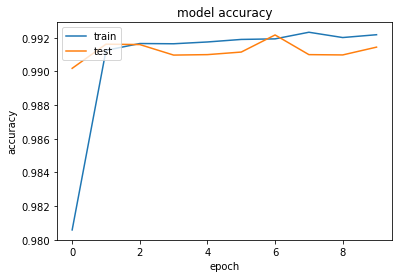

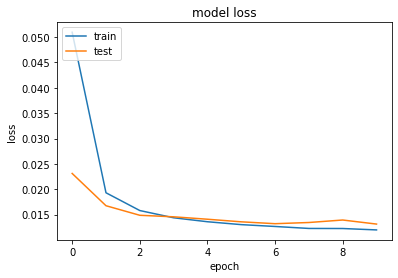

In [45]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
x = model.predict(X_word_train).argmax(axis=1)
# print(x,x.shape)

In [49]:
print(logits_to_tokens(x, {i: t for t, i in check_idx.items()}))

[['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'pad', 'pad'], ['pad', 'p

In [48]:
print(len('The source is comprised of 3,463,951 sentences. Here are the first 10.'))

70
